# DNA Classificiation to Detect the Presence of E-Coli

<center><img src="https://res.cloudinary.com/dtpgi0zck/image/upload/s--H1Mj07ir--/c_fill,h_580,w_860/v1/EducationHub/photos/e-coli.jpg" height="300"></center>

The coliform bacterium Escherichia coli, sometimes referred to as E. coli, belongs to the genus Escherichia and is typically found in the lower intestine of warm-blooded creatures. It is a Gram-negative, facultatively anaerobic, rod-shaped, coliform bacteria. While the majority of E. coli strains are benign, some serotypes (EPEC, ETEC, etc.) can seriously poison their hosts and occasionally cause food contamination situations that force product recalls. The beneficial, mutualistic strains are a natural component of the gut's microbiota and contribute to the health of their hosts by generating vitamin K2 and preventing the colonisation of the intestine by pathogenic bacteria. Fecal matter contains E. coli that is released into the environment. For three days, the bacterium multiplies strongly in new faeces under aerobic circumstances, but then slowly starts to diminish.

E. About 0.1% of the gut microbiota consists of facultative anaerobes like E. coli, and fecal-oral transmission is the main way pathogenic strains of the bacterium spread disease. For a brief period of time, cells can survive outside of the body, making them suitable indicator organisms for testing environmental samples for faecal contamination. However, a growing body of study has looked at environmentally persistent E. coli, which can endure and develop without a host for several days.

The bacterium can be grown and cultured easily and inexpensively in a laboratory setting, and has been intensively investigated for over 60 years. E. coli is a chemoheterotroph whose chemically defined medium must include a source of carbon and energy. E. coli is the most widely studied prokaryotic model organism, and an important species in the fields of biotechnology and microbiology, where it has served as the host organism for the majority of work with recombinant DNA. Under favorable conditions, it takes as little as 20 minutes to reproduce.

## This Project

In this project I will be working on a DNA dataset is composed of a section of E.Coli DNA whcih is encoded into 4 types oof DNA molecule;  A, C, G and T which correspond to:  adenine, cytosine, guanine and thymine.   The purpose of which is to detect the presence of E-Coli in human samples. 

I will be using a Neural Networking Architecture, specifically a MLPClassifier; multi-layer perceptron classifier.   I will then created a Django project which will be hosted on AWS.  






## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

## Import Libraries and Dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
names = ["Class", "ID", "Sequence"]
data = pd.read_csv(url, names = names)

## Exploring the Data

### Dataset Info
1. Title of Database: E. coli promoter gene sequences (DNA) with associated imperfect domain theory

2. Sources:
    * Creators: promoter instances: C. Harley (CHARLEY@McMaster.CA) and R. Reynolds 
non-promoter instances and domain theory: M. Noordewier
(non-promoters derived from work of lab of Prof. Tom Record, 
University of Wisconsin Biochemistry Department)
    * Donor: M. Noordewier and J. Shavlik, {noordewi,shavlik}@cs.wisc.edu
    * Date received: 6/30/90

3. Past Usage:

    * biological: 

       -- Harley, C. and Reynolds, R. 1987.  
          "Analysis of E. Coli Promoter Sequences."
          Nucleic Acids Research, 15:2343-2361.
          machine learning:
          
       -- Towell, G., Shavlik, J. and Noordewier, M. 1990.
          "Refinement of Approximate Domain Theories by Knowledge-Based
          Artificial Neural Networks." In Proceedings of the Eighth National
          Conference on Artificial Intelligence (AAAI-90).

    * attributes predicted: member/non-member of class of sequences with
biological promoter activity (promoters initiate the process of gene
expression).
    * Results of study indicated that machine learning techniques (neural
networks, nearest neighbor, contributors' KBANN system) performed as
well/better than classification based on canonical pattern matching
(method used in biological literature).

4. Relevant Information Paragraph:
   This dataset has been developed to help evaluate a "hybrid" learning
   algorithm ("KBANN") that uses examples to inductively refine preexisting
   knowledge.  Using a "leave-one-out" methodology, the following errors
   were produced by various ML algorithms.  (See Towell, Shavlik, &
   Noordewier, 1990, for details.)

	    System	 Errors		Comments
	    ------	 ------		--------
	     KBANN	  4/106		a hybrid ML system
	     BP		  8/106		std backprop with one hidden layer
	     O'Neill	 12/106		ad hoc technique from the bio. lit.
	     Near-Neigh  13/106		a nearest-neighbor algo (k=3)
	     ID3	 19/106		Quinlan's decision-tree builder
	     	
   Type of domain: non-numeric, nominal (one of A, G, T, C)
   -- Note: DNA nucleotides can be grouped into a hierarchy, as shown below:
```
		      X (any)
		    /   \
	  (purine) R     Y (pyrimidine)
		  / \   / \
		 A   G T   C
```



 
5. Number of Instances: 106

6. Number of Attributes: 59
   -- class (positive or negative)
   -- instance name
   -- 57 sequential nucleotide ("base-pair") positions

7. Attribute information:
   -- Statistics for numeric domains: No numeric features used.
   -- Statistics for non-numeric domains
      -- Frequencies:  Promoters Non-Promoters
                       --------- -------------
               A        27.7%     24.4%
               G        20.0%     25.4%
               T        30.2%     26.5%
               C        22.1%     23.7%

   Attribute #:  Description:
             1   One of {+/-}, indicating the class ("+" = promoter).
             2   The instance name (non-promoters named by position in the
                 1500-long nucleotide sequence provided by T. Record).
          3-59   The remaining 57 fields are the sequence, starting at 
                 position -50 (p-50) and ending at position +7 (p7). Each of
                 these fields is filled by one of {a, g, t, c}.

8. Missing Attribute Values: none

9. Class Distribution: 50% (53 positive instances, 53 negative instances)


### The Domain Theory (for recognising promoters):

Promoters have a region where a protein (RNA polymerase) must make contact and the helical DNA sequence must have a valid conformation so that the two pieces of the contact region spatially align.
Prolog notation is used.

`promoter :- contact, conformation.`

There are two regions "upstream" from the beginning of the gene at which the RNA polymerase makes contact. 

`contact  :- minus_35, minus_10.`

The following rules describe the compositions of possible contact regions.
   * minus_35 :- `p-37=c, p-36=t, p-35=t, p-34=g, p-33=a, p-32=c.`
   * minus_35 :- `        p-36=t, p-35=t, p-34=g,         p-32=c, p-31=a.`
   * minus_35 :-`         p-36=t, p-35=t, p-34=g, p-33=a, p-32=c, p-31=a.`
   * minus_35 :-`         p-36=t, p-35=t, p-34=g, p-33=a, p-32=c.`

   * minus_10 :-` p-14 t, p-13 a, p-12=t, p-11=a, p-10=a, p-9=t. `
   * minus_10 :-`         p-13 t, p-12=a,         p-10=a,        p-8=t.`
   * minus_10 :-`         p-13 t, p-12=a, p-11=t, p-10=a, p-9=a, p-8=t.`
   * minus_10 :-`                 p-12=t, p-11=a,                       p-7=t.`

The following rules describe sequence characteristics that produce acceptable conformations.
* conformation :- `p-47=c, p-46=a, p-45=a, p-43=t, p-42=t, p-40=a, p-39=c, p-22=g, p-18=t, p-16=c, p-8=g,  p-7=c,  p-6=g,  p-5=c, p-4=c,  p-2=c,  p-1=c.` 
* conformation :- `p-45=a, p-44=a, p-41=a.`
* conformation :- `p-49=a, p-44=t, p-27=t, p-22=a, p-18=t, p-16=t, p-15=g,  p-1=a.` 
* conformation :- `p-45=a, p-41=a, p-28=t, p-27=t, p-23=t, p-21=a, p-20=a, p-17=t, p-15=t, p-4=t.`

If exact matches are required, this domain theory matches NONE of the examples below.  Also note that some of the MINUS_35 rules are subsumed by another MINUS_35 rule.  This occurs because the biological evidence is inconclusive wrt the correct specificity.


In [3]:
data.head(10)

,Class,ID,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [4]:
data.shape

(106, 3)

In [5]:
data.dtypes

Class       object
ID          object
Sequence    object
dtype: object

## Refining and structuring the data

In [6]:
classes = data.loc[:, "Class"]
classes.head()
print(classes.value_counts())

+    53
-    53
Name: Class, dtype: int64


In [7]:
# generate a list of sequences
sequence = list(data.loc[:, "Sequence"])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [10]:
# remove the tab from each sequence
dic = {}
for i, seq in enumerate(sequence):
  nucleotides = list(seq)
  nucleotides = [char for char in nucleotides if char != "\t"]
  # append class
  nucleotides.append(classes[i])

  dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [11]:
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [12]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [13]:
# rename the 57th column as it is the class column
df.rename(columns = {57:"Class"}, inplace = True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


## Encoding target variable

`DataFrame.copy(deep=True)` - Make a copy of this object’s indices and data.

When `deep=True` (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

When `deep=False`, a new object will be created without copying the calling object’s data or index (only references to the data and index are copied). Any changes to the data of the original will be reflected in the shallow copy (and vice versa).

I am now going to separate my independant variables from my dependant variables before Encoding etc.   This will prevent data leakage. 

In [14]:
temp = df.copy(deep=True)
temp = temp.drop(["Class"], axis=1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [16]:
# encoding using the one hot encoder

enc = OneHotEncoder(handle_unknown = "ignore")
enc.fit(temp)

print(enc.categories_)

df1 = enc.transform(temp).toarray()
del temp

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [18]:
# save the encoder

with open("EColi-encoder.pickle", "wb") as f:
  pickle.dump(enc, f)

# code to load the file later
# encoder = pickle.load(f)
# data = encoder.transform(df).toarray()

In [20]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# fixing the class column
df["Class"] = df["Class"].replace(to_replace = ["+"], value = 1)
df["Class"] = df["Class"].replace(to_replace = ["-"], value = 0)
df_new["Classes"] = df["Class"]

df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


## Model Building

In [32]:
X = df_new.drop(["Classes"], axis = 1).values
y = df_new["Classes"].values

# define a seed 
seed = 42

# split the data into test and train. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [50]:
# engage and fit the model to the training data
model = MLPClassifier(hidden_layer_sizes = (150,100,50), max_iter=100, activation = "relu", solver="adam", random_state = seed)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))

1.0


In [51]:
# predicting y for X_val
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8888888888888888

In [52]:
# model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.88      0.93      0.90        15

    accuracy                           0.89        27
   macro avg       0.89      0.88      0.89        27
weighted avg       0.89      0.89      0.89        27



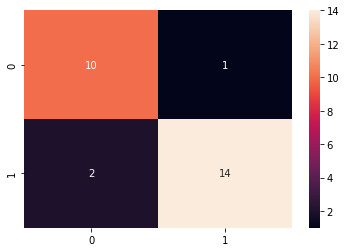

In [53]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

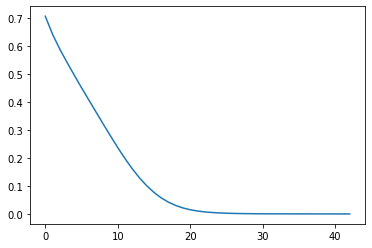

In [54]:
# plotting the MLPClassifier 

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [55]:
# saving the model
filename = "E-Coli_model.pickle"
pickle.dump(model, open(filename, "wb"))

## Test with New Data

In [56]:
genome = "ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcg"

genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g']


In [58]:
encoder = pickle.load(open("/content/EColi-encoder.pickle", "rb"))
data_test = encoder.transform(df_test).toarray()
print(model.predict(data_test))

[1]


In [59]:
type(model.predict(data_test)[0])

numpy.int64